#+TITLE: Convolutions
#+CATEGORIES: architecture
#+DESCRIPTION: Convolutions are mathematical operations that process input data using filters or kernels. The operation involves sliding the filter over the input data and performing an element-wise multiplication between the filter weights and the input window. These filters often learn to detect edges, shapes, or textures in image data in a translation invariant way.
#+DATE: 2020-01-02
#+HERO: /static/space-bg.png

# Overview

These models use a local connectivity pattern that convolves the inputs at each layer with a shared window of weights called a kernel or a filter. This connective structure enables networks to learn representations that are robust to translational shifts. Each convolutional layer consists of many kernels in which the outputs from this operation produce feature maps.

g is the filter. f is the input.
Spatial Convolution in 1 dimension.
$$
f[x] * g[x] = \sum_k f[i] \cdot g[x-i]
$$

In two dimensions,
$$
f[x, y] * g[x, y] = \sum_i \sum_j f[i, j] \cdot g[x-i, y-j]
$$


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torchvision

train_dataset = torchvision.datasets.MNIST('../data', train=True, download=False)
test_dataset = torchvision.datasets.MNIST('../data', train=False, download=False)

In /home/tim/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tim/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tim/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tim/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tim/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classi

In [29]:
def draw_image(image, label):
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

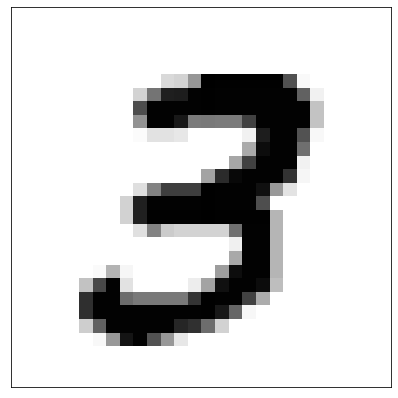

In [30]:
x, y = train_dataset[7]
x = np.array(x)
draw_image(x, y)

Now let's break the image up into patches.

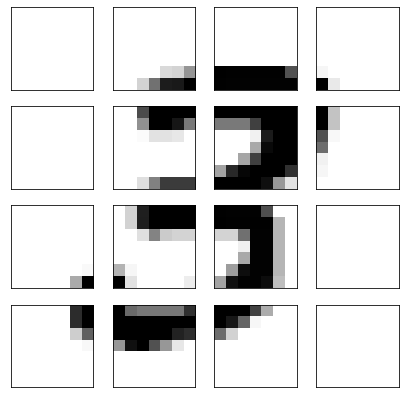

In [23]:


def draw_patches(x, y, filter_size):
    patches = []

    for i in range(0, x.shape[0], filter_size):
        for j in range(0, x.shape[1], filter_size):
            patches.append(x[i:i+filter_size, j:j+filter_size])

    plt.figure(figsize=(7,7))
    
    block_size = int(np.sqrt(len(patches)))
    
    for i in range(len(patches)):
        plt.subplot(block_size, block_size, i+1)
        draw_image(patches[i], '')
        
draw_patches(x, y, 7)

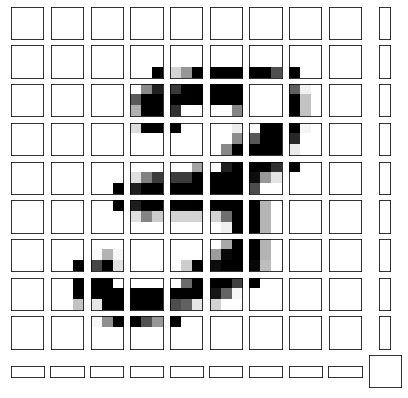

In [24]:
draw_patches(x, y, 3)

Since a 3x3 kernel doesn't evenly divide into a 28x28 image we have uneven patches in the last row and column.

What if we want some overlap?

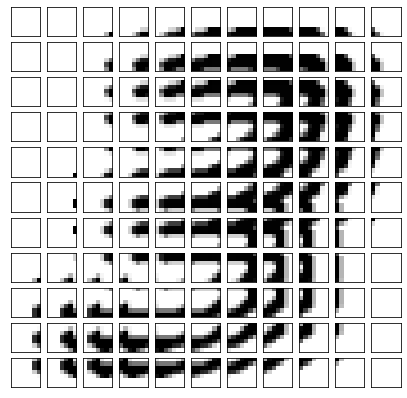

In [26]:
def draw_patches(x, y, filter_size, step_size):
    patches = []

    for i in range(0, x.shape[0], step_size):
        for j in range(0, x.shape[1], step_size):
            if i + filter_size < x.shape[0] and j + filter_size < x.shape[1]:
                patches.append(x[i:i+filter_size, j:j+filter_size])

    plt.figure(figsize=(7, 7))
    
    block_size = int(np.sqrt(len(patches)))
    
    for i in range(len(patches)):
        plt.subplot(block_size, block_size, i+1)
        draw_image(patches[i], '')
        
draw_patches(x, y, 7, 2)